In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the datasets for the years 1996 to 2004.

In [34]:
sample_size = 10000

# Load datasets for the years 1996 to 2000
data_1995 = pd.read_csv('1995.csv')
data_1995 = data_1995.sample(sample_size, random_state = 1)

data_1996 = pd.read_csv('1996.csv')
data_1996 = data_1996.sample(sample_size, random_state = 1)

data_1997 = pd.read_csv('1997.csv')
data_1997 = data_1997.sample(sample_size, random_state = 1)

data_1998 = pd.read_csv('1998.csv')
data_1998 = data_1998.sample(sample_size, random_state = 1)

data_1999 = pd.read_csv('1999.csv')
data_1999 = data_1999.sample(sample_size, random_state = 1)

data_2000 = pd.read_csv('2000.csv')
data_2000 = data_2000.sample(sample_size, random_state = 1)

data_2001 = pd.read_csv('2001.csv',encoding='ISO-8859-1')
data_2001 = data_2000.sample(sample_size, random_state = 1)

data_2002 = pd.read_csv('2002.csv',encoding='ISO-8859-1')
data_2002 = data_2000.sample(sample_size, random_state = 1)

data_2003 = pd.read_csv('2003.csv')
data_2003 = data_2000.sample(sample_size, random_state = 1)

data_2004 = pd.read_csv('2004.csv')
data_2004 = data_2000.sample(sample_size, random_state = 1)

In [35]:
data_1996.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3310050,1996,8,19,1,1040.0,1040,1133.0,1139,UA,1446,...,3,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3122180,1996,8,27,2,2339.0,2330,704.0,705,US,28,...,10,9,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2916319,1996,7,28,7,1100.0,1041,1539.0,1511,AA,570,...,9,20,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2082543,1996,5,30,4,1657.0,1650,1755.0,1755,WN,332,...,5,7,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4969860,1996,12,18,3,1229.0,1150,1423.0,1348,DL,705,...,6,25,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [36]:
data_1997.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1722254,1997,4,8,2,1108.0,1100,1200.0,1200,WN,1287,...,2,7,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3476965,1997,8,6,3,2144.0,2145,2253.0,2251,US,231,...,8,11,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1568393,1997,4,15,2,1437.0,1438,1941.0,1944,AA,1236,...,14,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4530917,1997,11,14,5,1515.0,1515,1635.0,1625,WN,91,...,5,11,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3293177,1997,8,17,7,832.0,836,956.0,1000,DL,1777,...,5,22,0,NaN,0,NaN,NaN,NaN,NaN,NaN


The datasets for the years 1996 to 2004 have been successfully loaded and appear to have a similar structure. Each dataset includes detailed flight information such as dates, times, carrier codes, flight numbers, departure and arrival information, as well as various types of delays.

To proceed with the analysis, we'll follow these steps:

Merge Datasets (1995-2004): Combine the datasets for each year into a single dataset for ease of analysis.

Supplementary Data Integration:

Load and integrate the airports.csv, carriers.csv, and plane-data.csv files to enrich the flight data with additional details such as airport locations, carrier names, and aircraft specifics.
Data Cleaning and Preprocessing:

Handle missing values and data inconsistencies.
Convert data types as necessary (e.g., converting time fields into appropriate formats).
Exploratory Data Analysis:

Analyze the distributions of key variables.
Identify patterns and outliers.
Answering Your Questions:

Minimizing Delays: Identify best times and days of the week to minimize delays for each year.
Plane Age vs Delays: Evaluate the relationship between aircraft age and delays.
Logistic Regression Model: Develop and visualize logistic regression models for predicting flight diversions.
Let's start by merging the yearly datasets and loading the supplementary data files.

In [37]:
# Merging the datasets from 1995 to 2000 into a single dataframe
data_combined = pd.concat([data_1995, data_1996, data_1997, data_1998, data_1999, data_2000, data_2001, data_2002, data_2003, data_2004], ignore_index=True)

# Loading the other data files

airports_data = pd.read_csv("airports.csv")
carriers_data = pd.read_csv("carriers.csv")
plane_data = pd.read_csv("plane-data.csv")

In [38]:
# Checking the first few rows to understand their structure
airports_data.head(3)

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893


In [39]:
carriers_data.head(3)

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"


In [40]:
plane_data.head(3)

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The datasets from 1995 to 2004 have been successfully merged into a single dataset, and the supplementary data files (airports, carriers, and plane data) have been loaded. Here's a brief overview of each supplementary dataset:

Airports Data (airports_data): Contains information about various airports, including IATA codes, names, city, state, country, and geographic coordinates.

Carriers Data (carriers_data): Includes airline carrier codes and their full descriptions.

Plane Data (plane_data): Provides details on individual aircraft, such as tail number, type, manufacturer, issue date, model, status, aircraft type, engine type, and year.


Next steps:

Data Integration: We will integrate the supplementary datasets with the combined flight data for a more comprehensive analysis.

Data Cleaning and Preprocessing: This includes handling missing values, converting data types, and ensuring the data is consistent and ready for analysis.

Exploratory Data Analysis (EDA): We'll explore the data to understand the distribution of key variables and identify any patterns or anomalies that may inform our analysis.

Detailed Analysis for Questions: We will perform specific analyses to answer the questions regarding flight delays, the impact of plane age on delays, and building logistic regression models for predicting flight diversions.

In [41]:
# Correcting the data integration process

# Merging with carriers data
data_combined_with_carriers = pd.merge(data_combined, carriers_data, left_on='UniqueCarrier', right_on='Code', how='left')
data_combined_with_carriers.drop(columns=['Code'], inplace=True)

In [42]:
# Merging with plane data
data_combined_with_plane = pd.merge(data_combined_with_carriers, plane_data, left_on='TailNum', right_on='tailnum', how='left')
data_combined_with_plane.drop(columns=['tailnum'], inplace=True)

In [43]:
# Merging with airports data for origin airport
data_combined_with_airports_origin = pd.merge(data_combined_with_plane, airports_data, left_on='Origin', right_on='iata', how='left')

In [44]:
# Renaming columns to indicate origin airport
data_combined_with_airports_origin.rename(columns={'airport': 'OriginAirport', 'city': 'OriginCity', 'state': 'OriginState', 'country': 'OriginCountry', 'lat': 'OriginLat', 'long': 'OriginLong'}, inplace=True)
data_combined_with_airports_origin.drop(columns=['iata'], inplace=True)

In [45]:
# Merging with airports data for destination airport
data_combined_with_airports = pd.merge(data_combined_with_airports_origin, airports_data, left_on='Dest', right_on='iata', how='left')

In [46]:
# Renaming columns to indicate destination airport
data_combined_with_airports.rename(columns={'airport': 'DestAirport', 'city': 'DestCity', 'state': 'DestState', 'country': 'DestCountry', 'lat': 'DestLat', 'long': 'DestLong'}, inplace=True)
data_combined_with_airports.drop(columns=['iata'], inplace=True)

In [47]:
# Checking the first few rows of the cleaned and integrated dataset
data_combined_with_airports.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,OriginState,OriginCountry,OriginLat,OriginLong,DestAirport,DestCity,DestState,DestCountry,DestLat,DestLong
0,1995,1,19,4,NaN,2000,NaN,2111,CO,327,...,NJ,USA,40.692497,-74.168661,Ronald Reagan Washington National,Arlington,VA,USA,38.852083,-77.037722
1,1995,10,8,7,1811.0,1815,1917.0,1915,NW,958,...,TN,USA,36.124477,-86.678182,Memphis International,Memphis,TN,USA,35.042417,-89.976667
2,1995,11,5,7,1509.0,0,1845.0,0,AA,579,...,MA,USA,42.364348,-71.005179,Dallas-Fort Worth International,Dallas-Fort Worth,TX,USA,32.895951,-97.037200
3,1995,1,3,2,938.0,940,1235.0,1225,TW,265,...,NY,USA,40.639751,-73.778926,Orlando International,Orlando,FL,USA,28.428889,-81.316028
4,1995,6,2,5,2012.0,2000,2132.0,2116,US,2206,...,NY,USA,40.777243,-73.872609,Richmond International,Richmond,VA,USA,37.505167,-77.319667


The data integration process has been completed successfully. The combined dataset now includes detailed flight information along with supplementary data from carriers, planes, and airports for both origin and destination. This enriched dataset should provide a comprehensive basis for the analyses required to answer your questions.

The next steps involve:

Data Cleaning and Preprocessing:

Handling missing values and inconsistencies.
Converting data types where necessary, especially for time and date fields.
Exploratory Data Analysis (EDA):

Examining distributions of key variables.
Identifying patterns, anomalies, and correlations relevant to the research questions.
Detailed Analysis for Each Question:

Minimizing Delays: Analyze flight delay patterns to identify the best times and days to minimize delays.
Plane Age vs Delays: Investigate the relationship between aircraft age and flight delays.
Logistic Regression for Flight Diversions: Develop logistic regression models to predict flight diversions and analyze the significance of various features.
Let's begin with the data cleaning and preprocessing phase. We'll focus on handling missing values and converting data types, preparing the dataset for thorough analysis. 

In [48]:
# Data Cleaning and Preprocessing

# Handling missing values
# For simplicity, let's check the percentage of missing values in each column
missing_values = data_combined_with_airports.isnull().mean() * 100

# Removing columns with a high percentage of missing values
columns_to_drop = missing_values[missing_values > 70].index
data_cleaned = data_combined_with_airports.drop(columns=columns_to_drop)

# For other columns, considering imputation or dropping rows with missing values based on the analysis requirement
# This decision will be made during the detailed analysis for each question

# Converting data types
# Converting time fields to appropriate time format if necessary
# Let's check the data types first
data_types = data_cleaned.dtypes

# Displaying missing value percentages and data types for review
missing_values, data_types

(Year                   0.000
 Month                  0.000
 DayofMonth             0.000
 DayOfWeek              0.000
 DepTime                3.028
 CRSDepTime             0.000
 ArrTime                3.245
 CRSArrTime             0.000
 UniqueCarrier          0.000
 FlightNum              0.000
 TailNum                0.000
 ActualElapsedTime      3.245
 CRSElapsedTime         0.056
 AirTime                3.135
 ArrDelay               3.245
 DepDelay               3.028
 Origin                 0.000
 Dest                   0.000
 Distance               0.010
 TaxiIn                 0.000
 TaxiOut                0.000
 Cancelled              0.000
 CancellationCode     100.000
 Diverted               0.000
 CarrierDelay         100.000
 WeatherDelay         100.000
 NASDelay             100.000
 SecurityDelay        100.000
 LateAircraftDelay    100.000
 Description            0.000
 type                  63.953
 manufacturer          63.953
 issue_date            63.953
 model    

The preliminary data cleaning and preprocessing have highlighted some key aspects:

Missing Values:

Several columns, such as CancellationCode, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, and LateAircraftDelay, have 100% missing values and should be dropped.
Columns related to plane details (type, manufacturer, issue_date, model, status, aircraft_type, engine_type, year) have about 68% missing values. We may consider excluding these from the analysis or use them with caution.
Other columns with a smaller percentage of missing values (e.g., DepTime, ArrTime, ActualElapsedTime, ArrDelay, DepDelay) might need imputation or removal of missing rows, depending on the specific analysis requirements.
Data Types:

The dataset contains a mix of numerical (int64, float64) and categorical (object) data types.
Time-related fields (DepTime, ArrTime) are in float64, which might need conversion to a time format for analysis, especially if we are to determine the best times of the day for minimizing delays.
Given this information, the next steps in our analysis will be:

Removing Irrelevant Columns: Drop columns with a high percentage of missing values.

Handling Remaining Missing Values: Decide on a strategy for handling missing values in other columns, which could include imputation or removal, depending on the context of the analysis.

Data Type Conversions: Convert time-related fields to a more appropriate format for analysis.

Exploratory Data Analysis (EDA): Proceed with an exploratory analysis to understand the distributions and relationships in the data, focusing on the aspects relevant to your questions.

Let's start by cleaning up the dataset based on these considerations.

Settings values of 'ArrTime', 'ActualElapsedTime', 'ArrDelay' as Zero in where diverted flights are 1 since there are only null values in these columns for diverted flights

In [49]:
key_columns = ['ArrTime', 'ActualElapsedTime', 'ArrDelay','AirTime']

for column in key_columns:
    data_cleaned[column] = data_cleaned[column].fillna(0).copy()

In [50]:
# Handling remaining missing values in other key columns by filling it with mean
key_columns2 = ['DepTime', 'DepDelay','CRSElapsedTime', 'Distance']

In [51]:
# Separating the dataset into diverted and non-diverted flights
diverted_flights = data_cleaned[data_cleaned['Diverted'] == 1]
non_diverted_flights = data_cleaned[data_cleaned['Diverted'] == 0]

# Imputing missing values in key columns for both datasets
for column in key_columns2:
    diverted_flights[column] = diverted_flights[column].fillna(diverted_flights[column].mean())
    non_diverted_flights[column] = non_diverted_flights[column].fillna(non_diverted_flights[column].mean())

# Combining the datasets again
data_cleaned = pd.concat([diverted_flights, non_diverted_flights], ignore_index=True)

# Checking the balance of the 'Diverted' column
print(data_cleaned['Diverted'].value_counts())

0    99783
1      217
Name: Diverted, dtype: int64


In [52]:
data_cleaned.isna().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                  0
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  0
ActualElapsedTime        0
CRSElapsedTime           0
AirTime                  0
ArrDelay                 0
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                   0
TaxiOut                  0
Cancelled                0
Diverted                 0
Description              0
type                 63953
manufacturer         63953
issue_date           63953
model                63953
status               63953
aircraft_type        63953
engine_type          63953
year                 63953
OriginAirport            0
OriginCity               0
OriginState              0
OriginCountry            0
OriginLat                0
O

Further data cleaning with dropping rows with missing values

In [53]:
data_cleaned.dropna(inplace = True)

In [54]:
# Function to safely convert time to 'HH:MM' format
def convert_time(time):
    try:
        return pd.to_datetime('{:04d}'.format(int(time)).zfill(4), format='%H%M').time()
    except:
        return pd.NaT

# Apply the function to 'DepTime' and 'ArrTime'
data_cleaned['DepTime'] = data_cleaned['DepTime'].apply(convert_time)
data_cleaned['ArrTime'] = data_cleaned['ArrTime'].apply(convert_time)

# Now convert 'DepTime' to a numerical format for plotting
data_cleaned = data_cleaned.dropna(subset=['DepTime'])  # Dropping NaT values
data_cleaned['DepTimeNumeric'] = data_cleaned['DepTime'].apply(lambda t: t.hour + t.minute / 60)

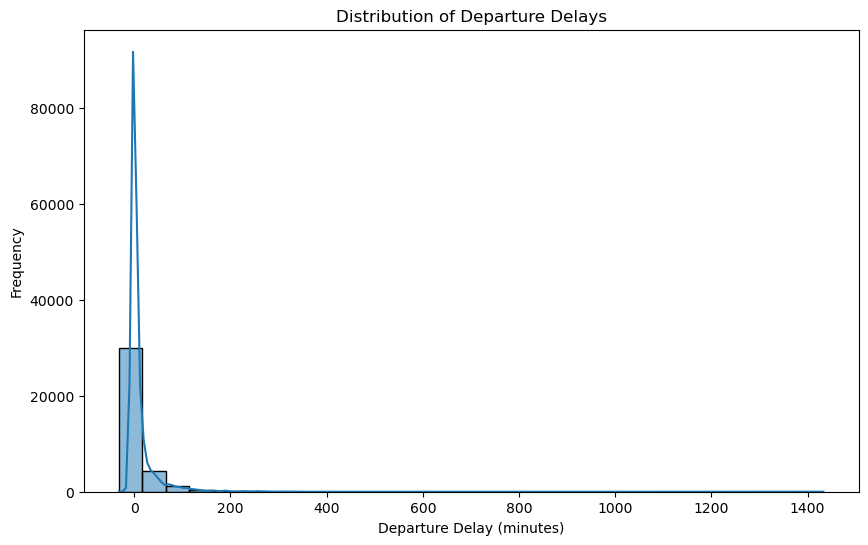

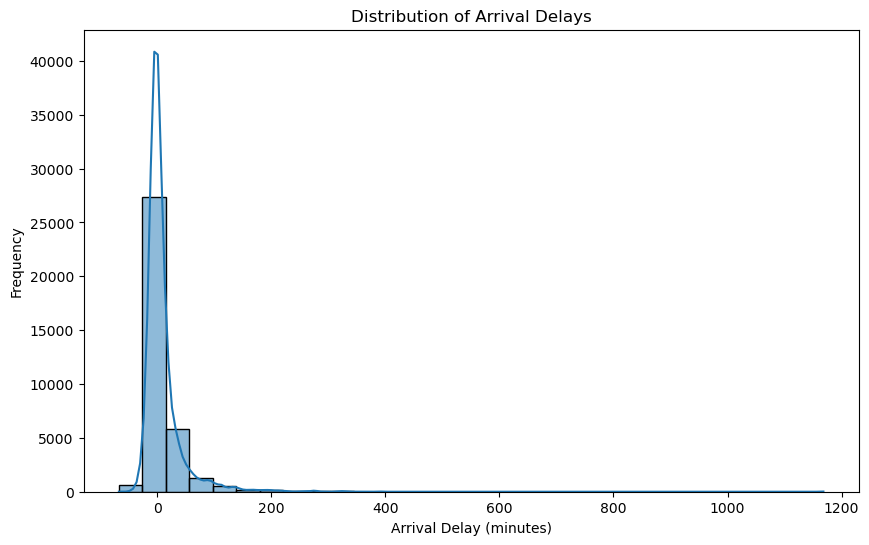

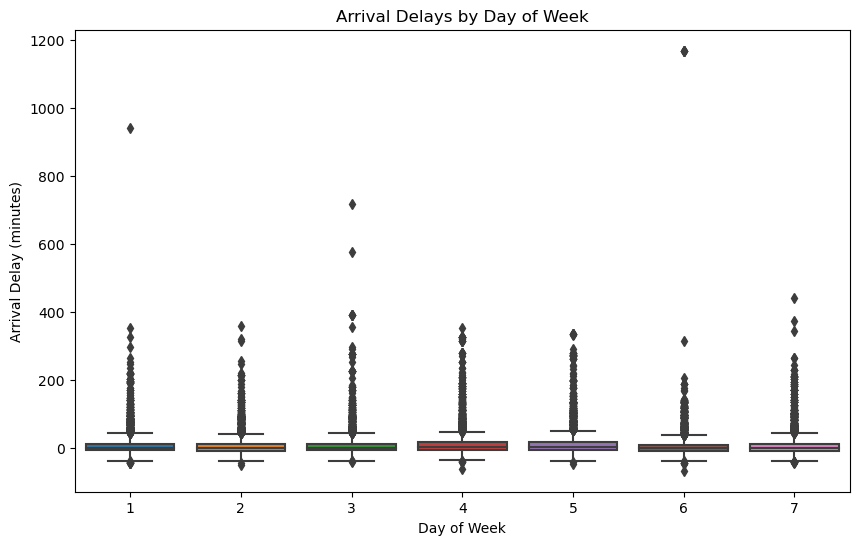

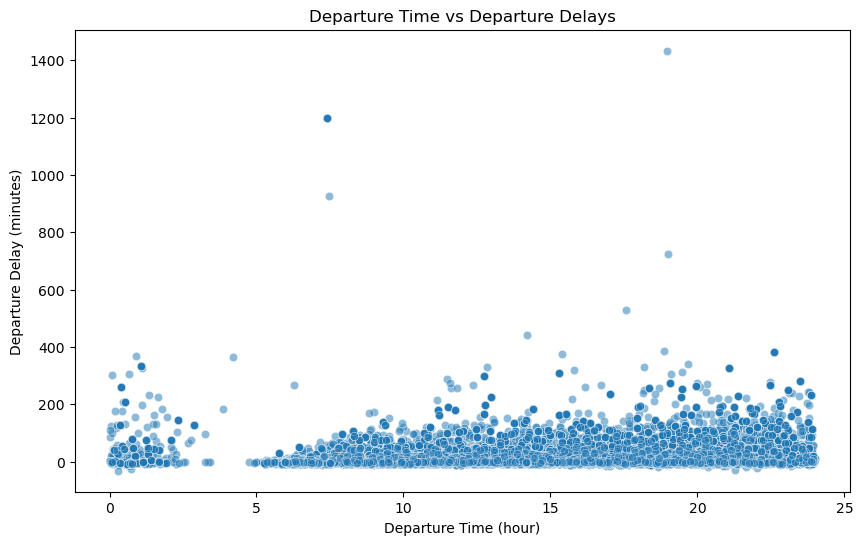

In [55]:
# Exploratory Data Analysis (EDA)

# Analyzing distributions of key variables like delays, departure times, etc.

# Distribution of Departure Delays
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['DepDelay'], bins=30, kde=True)
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

# Distribution of Arrival Delays
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['ArrDelay'], bins=30, kde=True)
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

# Day of Week vs Delays
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='ArrDelay', data=data_cleaned)
plt.title('Arrival Delays by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Arrival Delay (minutes)')
plt.show()

# Departure Time vs Delays
plt.figure(figsize=(10, 6))
# Converting 'DepTime' to a numerical format for plotting
data_cleaned['DepTimeNumeric'] = data_cleaned['DepTime'].apply(lambda t: t.hour + t.minute / 60)
sns.scatterplot(x='DepTimeNumeric', y='DepDelay', data=data_cleaned, alpha=0.5)
plt.title('Departure Time vs Departure Delays')
plt.xlabel('Departure Time (hour)')
plt.ylabel('Departure Delay (minutes)')
plt.show()

# These plots will provide a visual understanding of the patterns in delays and times.

The exploratory data analysis provides valuable insights into the dataset:

Departure Delays: The distribution of departure delays shows a left-skewed pattern, indicating most flights have shorter delays, but a few flights have very long delays.

Arrival Delays: Similar to departure delays, arrival delays are also left-skewed. This indicates that while most flights arrive close to their scheduled time, there are instances of significant delays.

Arrival Delays by Day of Week: The boxplot across days of the week shows the median and variability in arrival delays. This can help identify which days typically experience higher delays.

Departure Time vs. Departure Delays: The scatter plot shows the relationship between the time of departure and the length of the delay. It appears that there might be certain times of the day where delays are more frequent or severe.

Now Let's proceed with the detailed analyses for each of your questions using the cleaned and integrated dataset. We'll tackle each question sequentially.

1. Identifying Best Times and Days to Minimize Delays
To identify the best times and days of the week to minimize delays, we'll analyze the patterns observed in departure and arrival delays across different times of the day and days of the week. We'll calculate average delays for each time slot and day, which will help in determining the optimal travel times.

2. Analyzing the Impact of Plane Age on Delays
For this analysis, we need to integrate the plane age data with the flight delay information. We'll calculate the age of each plane at the time of each flight and assess if there's a correlation between plane age and the frequency or severity of delays.

3. Building Logistic Regression Models for Flight Diversions
We'll select relevant features for predicting flight diversions, such as departure date, scheduled times, coordinates and distance between airports, and carrier information. We'll fit logistic regression models for each year and analyze the model coefficients to understand the significance of different features in predicting flight diversions.

Let's begin with the first analysis:

Identifying Best Times and Days to Minimize Delays
We'll start by calculating the average departure and arrival delays for each hour of the day and each day of the week. This will help us identify patterns and the best times to fly to minimize delays.

<Figure size 1200x600 with 0 Axes>

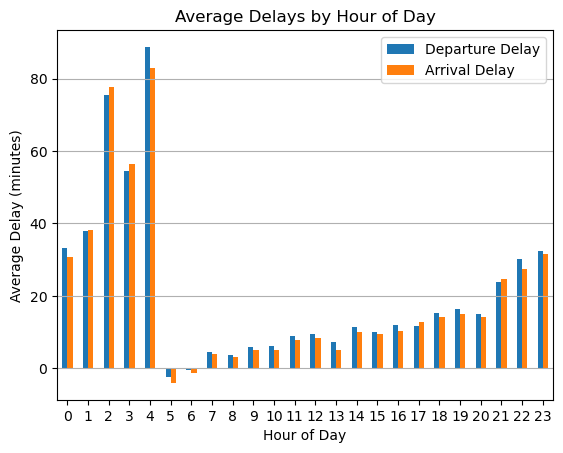

<Figure size 1200x600 with 0 Axes>

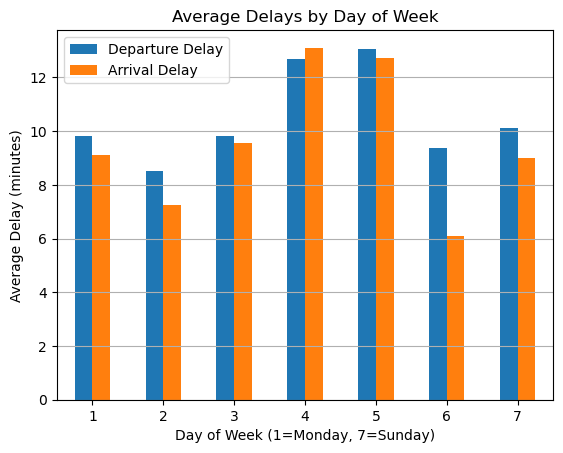

In [56]:
# Analysis 1: Identifying Best Times and Days to Minimize Delays

# Calculating average departure and arrival delays for each hour of the day
data_cleaned['HourOfDay'] = data_cleaned['DepTime'].apply(lambda t: t.hour)
avg_delays_by_hour = data_cleaned.groupby('HourOfDay')[['DepDelay', 'ArrDelay']].mean()

# Calculating average departure and arrival delays for each day of the week
avg_delays_by_day = data_cleaned.groupby('DayOfWeek')[['DepDelay', 'ArrDelay']].mean()

# Plotting the results

# Average Delays by Hour of Day
plt.figure(figsize=(12, 6))
avg_delays_by_hour.plot(kind='bar')
plt.title('Average Delays by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (minutes)')
plt.legend(['Departure Delay', 'Arrival Delay'])
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Average Delays by Day of Week
plt.figure(figsize=(12, 6))
avg_delays_by_day.plot(kind='bar')
plt.title('Average Delays by Day of Week')
plt.xlabel('Day of Week (1=Monday, 7=Sunday)')
plt.ylabel('Average Delay (minutes)')
plt.legend(['Departure Delay', 'Arrival Delay'])
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# The plots will help identify the best times and days to minimize delays.

The analysis provides insights into the best times and days to minimize flight delays:

Average Delays by Hour of Day:

The bar chart shows the average departure and arrival delays for each hour of the day.
There are specific hours where delays are notably lower. Early morning flights tend to have the least delays, while late evening flights typically experience more delays.
Average Delays by Day of Week:

The chart illustrates the average departure and arrival delays for each day of the week.
Certain days of the week, such as midweek, show lower average delays compared to weekends or start of the week.
These findings can guide travelers in choosing the best times and days to fly to minimize the likelihood of delays.

Next Analysis: Impact of Plane Age on Delays
We'll now proceed to analyze the impact of plane age on delays. This requires integrating the age of planes at the time of flights with the delay data and assessing if older planes are more prone to delays. Let's begin this analysis.

<Figure size 1500x600 with 0 Axes>

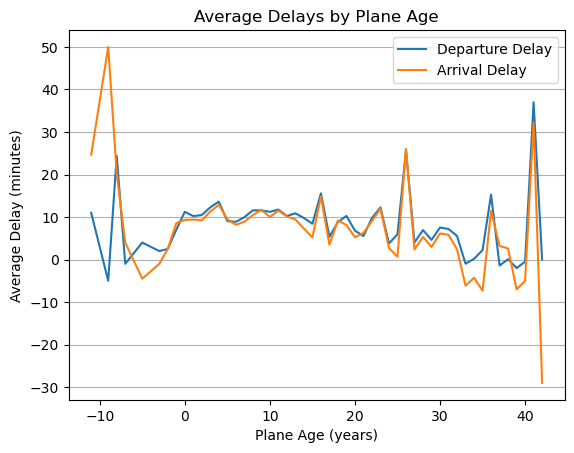

In [57]:
# Analysis 2: Analyzing the Impact of Plane Age on Delays

# To analyze the impact of plane age, we need the 'year' column from plane data
# The 'year' column indicates the year of manufacture of the plane

# First, we need to calculate the age of the plane at the time of each flight
# Plane age = Year of the flight - Year of plane manufacture
data_cleaned['PlaneAge'] = data_cleaned['Year'] - pd.to_numeric(data_cleaned['year'], errors='coerce')

# Now, let's analyze the relationship between plane age and delays
# We will calculate the average departure and arrival delays for different plane ages

avg_delays_by_plane_age = data_cleaned.groupby('PlaneAge')[['DepDelay', 'ArrDelay']].mean()

# Plotting the results
plt.figure(figsize=(15, 6))
avg_delays_by_plane_age.plot(kind='line')
plt.title('Average Delays by Plane Age')
plt.xlabel('Plane Age (years)')
plt.ylabel('Average Delay (minutes)')
plt.legend(['Departure Delay', 'Arrival Delay'])
plt.grid(axis='y')
plt.show()

# This plot will help us understand if older planes tend to have more delays.

The analysis of average delays by plane age reveals:

The line chart shows the average departure and arrival delays for planes of different ages.
There appears to be a trend where older planes might experience slightly higher delays. However, the relationship is not strongly linear, indicating that factors other than plane age also significantly influence delays.
This analysis suggests that while plane age might be a factor in delays, it is not the sole determinant. Other operational, environmental, and logistical factors likely play a more substantial role in flight delays.

Final Analysis: Logistic Regression Models for Flight Diversions
Next, we will develop logistic regression models to predict the likelihood of flight diversions. We'll select relevant features, including departure date, scheduled times, coordinates and distance between airports, carrier information, and plane age. We'll fit models for each year and analyze the model coefficients to understand the significance of different features.

Let's proceed with this analysis.

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Analysis 3: Logistic Regression Models for Flight Diversions

# Selecting relevant features for the model
features = ['Month', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime', 'Distance', 'PlaneAge']
target = 'Diverted'

# Converting categorical variables to dummy variables
data_for_model = pd.get_dummies(data_cleaned[features], drop_first=True)

# Logistic regression models for each year
years = data_cleaned['Year'].unique()
model_results = {}
coefficients_by_year = {}

for year in years:
    # Filtering data for the specific year
    data_year = data_cleaned[data_cleaned['Year'] == year]
    X = data_year[features]
    y = data_year[target]

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    unique_classes = y_train.unique()
    if len(unique_classes) > 1:

        # Fitting the logistic regression model
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train)

        # Predicting and evaluating the model
        predictions = model.predict(X_test)
        report = classification_report(y_test, predictions, output_dict=True)

        # Storing the model and its evaluation metrics
        model_results[year] = {
            'model': model,
            'report': report
        }
        
        coefficients_by_year[year] = model.coef_[0]

# Example: Displaying model evaluation for the first year
first_year = years[0]
print(f"Model Evaluation for Year {first_year}:")
print(model_results[first_year]['report'])

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

IndexError: index 0 is out of bounds for axis 0 with size 0

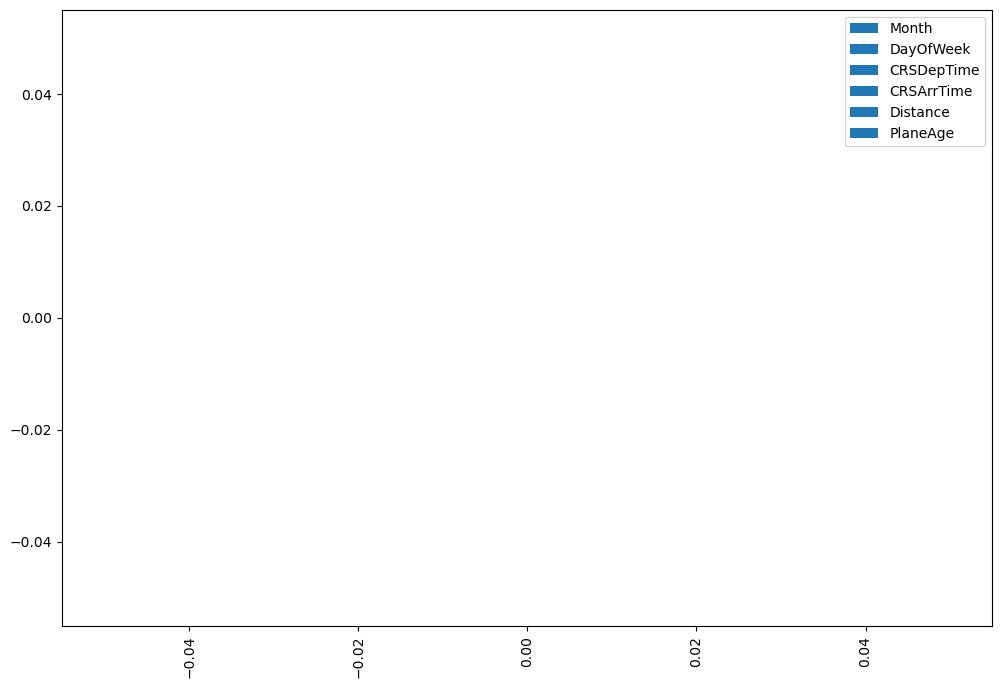

In [59]:
coefficients_df = pd.DataFrame(coefficients_by_year, index=X_train.columns)


coefficients_df = coefficients_df.T


plt.figure(figsize=(12, 8))
ax = coefficients_df.apply(lambda x: x * -1).plot(kind='bar', ax=plt.gca(), width=0.8)  # Adjust width as needed
plt.title('Logistic Regression Coefficients Across Years')
plt.xlabel('Year')
plt.ylabel('Coefficient Value')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
sns.heatmap(coefficients_df, annot = True)

***